<h1> Data Analytics - II : Logistic Regression</h1>

<h4> Problem Statement </h4>
<h5> 1. Implement logistic regression using Python/R to perform
classification on
Social_Network_Ads.csv dataset.<br>
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.</h5>

In [25]:
#imports 
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
data = pd.read_csv("Social_Network_Ads.csv")

In [27]:
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
391,15592570,Male,47,23000,1
320,15774872,Female,52,138000,1
152,15699247,Male,31,76000,0
363,15768293,Female,42,79000,0
24,15705113,Male,46,23000,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [29]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [30]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

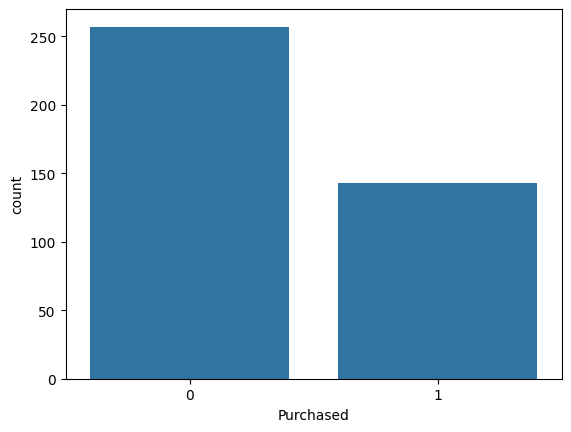

In [31]:
# Target label : 'Purchased'
sns.countplot(data = data, x = 'Purchased');

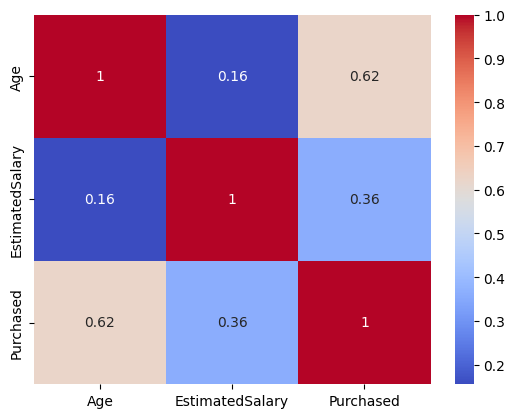

In [32]:
# Finding useful features 
sns.heatmap(data[['Age','EstimatedSalary','Purchased']].corr(), annot = True, cmap= 'coolwarm' );

In [33]:
features = data[['Age', 'EstimatedSalary']]
label = data['Purchased']

In [34]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [35]:
x = features
y = label

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model

In [37]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### Prediction

In [38]:
y_pred = model.predict(x_test)

In [39]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

### Evaluation

<Axes: >

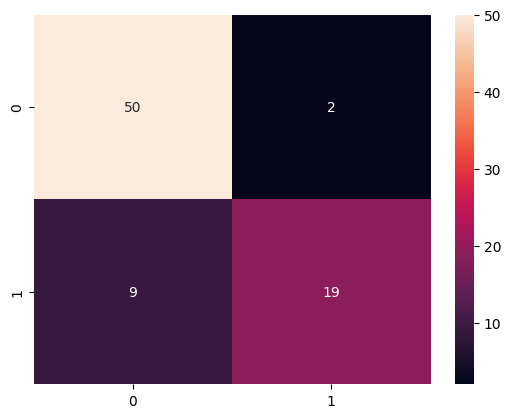

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [54]:
tp,fn,fp,tn=confusion_matrix(y_test, y_pred,labels=[0,1]).reshape(-1)
Accuray=(tn+tp)/(tp+fp+tn+fn)
Error_rate=(fn+fp)/(tp+fp+tn+fn)

In [55]:
Accuray

0.8625

In [57]:
Error_rate

0.1375

can remove

In [42]:
cm=confusion_matrix(y_test,y_pred)

In [43]:
cm

array([[50,  2],
       [ 9, 19]])

In [44]:
c1_report=classification_report(y_test,y_pred)

In [50]:
c1_report

'              precision    recall  f1-score   support\n\n           0       0.85      0.96      0.90        52\n           1       0.90      0.68      0.78        28\n\n    accuracy                           0.86        80\n   macro avg       0.88      0.82      0.84        80\nweighted avg       0.87      0.86      0.86        80\n'

In [49]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=[0,1]).reshape(-1)
print("outcome values: \n",tp,fn,fp,tn)

outcome values: 
 50 2 9 19


In [47]:
accuracy_cm=(tp+tn)/(tp+fp+tn+fn)
precision_cm=tp/(tp+tn)
recall_cm=tp/(tp+fn)
f1_score=2/(1/recall_cm)+(1/precision_cm)

In [48]:
print("accuracy: ",accuracy_cm)
print("precision: ",precision_cm)
print("recall:",recall_cm)
print("f1-score: ",f1_score)

accuracy:  0.8625
precision:  0.7246376811594203
recall: 0.9615384615384616
f1-score:  3.303076923076923
